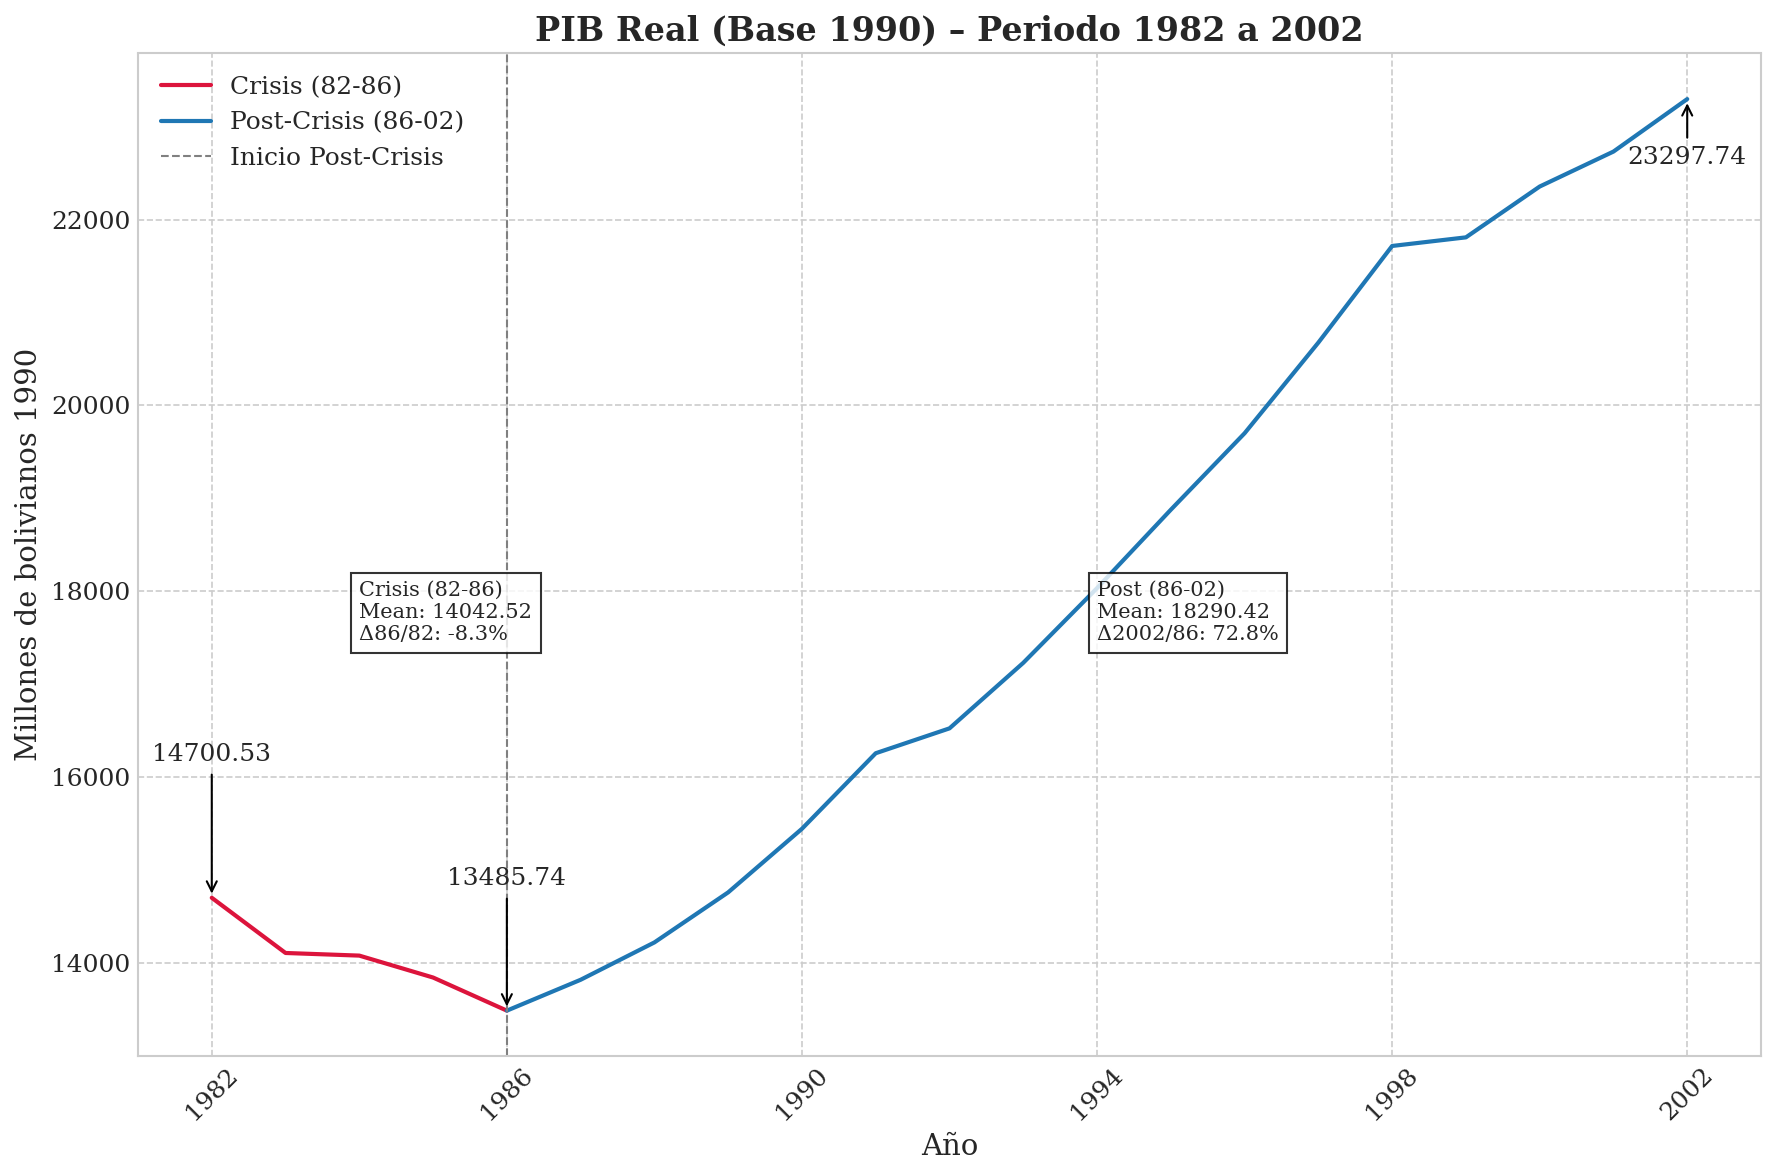

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os

# ------------------------------------------------------------------
# 1. Directorio de salida
# ------------------------------------------------------------------
output_dir = "../../../assets/tesis/neoliberalismo/serie_completa"
os.makedirs(output_dir, exist_ok=True)

# ------------------------------------------------------------------
# 2. Estilo profesional
# ------------------------------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family'    : 'serif',
    'font.size'      : 12,
    'axes.titlesize' : 16,
    'axes.labelsize' : 14,
    'grid.linestyle' : '--',
    'lines.linewidth': 2,
    'figure.dpi'     : 150,
    'savefig.bbox'   : 'tight'
})
def estad_crisis(s):
    mean = s.loc[1982:1986].mean()
    delta= (s.loc[1986] - s.loc[1982]) / s.loc[1982] * 100
    return f"Crisis (82‑86)\nMean: {mean:.2f}\nΔ86/82: {delta:.1f}%"

def estad_post(s):
    mean = s.loc[1986:2002].mean()
    delta= (s.loc[2002] - s.loc[1986]) / s.loc[1986] * 100
    return f"Post (86‑02)\nMean: {mean:.2f}\nΔ2002/86: {delta:.1f}%"

# ------------------------------------------------------------------
# 3. Carga de datos
# ------------------------------------------------------------------
conn = sqlite3.connect('../../../db/proyectomacro.db')
df_pib = pd.read_sql_query("SELECT * FROM pib_real_gasto", conn)
conn.close()

df_pib.set_index('año', inplace=True)
df_pib = df_pib.loc[1982:2002]              # periodo 2 completo
df_pib["pib_real_base_1990"] /= 1000         # escalar a millones

# ------------------------------------------------------------------
# 4. Definir periodos Crisis vs Post‑Crisis
# ------------------------------------------------------------------
df_crisis = df_pib.loc[1982:1986]            # 1982‑1986 inclusive
df_post   = df_pib.loc[1986:2002]            # 1986‑2002 inclusive
df_full   = df_pib                          # para anotaciones


# ------------------------------------------------------------------
# 5. Crear figura y trazar
# ------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 8))

# crisis en rojo, post‑crisis en azul
ax.plot(df_crisis.index, df_crisis['pib_real_base_1990'],
        color='crimson', label='Crisis (82‑86)')
ax.plot(df_post.index, df_post['pib_real_base_1990'],
        color='#1f77b4', label='Post‑Crisis (86‑02)')

# línea separadora en 1986
ax.axvline(x=1986, color='gray', linestyle='--', linewidth=1,
           label='Inicio Post‑Crisis')

# anotaciones en años clave
for year in (1982, 1986, 2002):
    if year in df_full.index:
        val = df_full.loc[year, 'pib_real_base_1990']
        y_text = val * (0.97 if year == 2002 else 1.1)
        ax.annotate(f"{val:.2f}", xy=(year, val),
                    xytext=(year, y_text),
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    fontsize=12, ha='center')

# cuadros de estadísticas
ax.text(1984, df_full['pib_real_base_1990'].max() * 0.75,
        estad_crisis(df_crisis['pib_real_base_1990']), fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
ax.text(1994, df_full['pib_real_base_1990'].max() * 0.75,
        estad_post(df_post['pib_real_base_1990']), fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

# etiquetas, leyenda y formato
ax.set_title('PIB Real (Base 1990) – Periodo 1982 a 2002', fontweight='bold')
ax.set_xlabel('Año')
ax.set_ylabel('Millones de bolivianos 1990')
ax.legend(loc='upper left')
ax.set_xticks(range(1982, 2003, 4))
ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "pib.png"))
plt.show()
